In [1]:
import numpy as np

In [2]:
from classes.model import Model
from classes.scenario import Scenario
from classes.setup import Setup
from classes.map import Map

setup = Setup()

# Scenario overwrites default values
scenario = Scenario({
    "setup": setup,
    'name': 'drip-and-ship',
    "run_duration": 5,  # years
})

pathway_maps = Map({'setup': setup})

In [3]:
vars(setup)

{'create_new_dir_output_all_scenarios': False,
 'path_before_dir_output_top': '.',
 'dir_reference_data': 'data',
 'dir_reference_data_geojson': 'data_geojson',
 'dir_output_top': './output',
 'dir_output_all_scenarios': './output/output_group!91',
 'dir_scenario': './output/output_group!91/drip-and-ship',
 'list_dir_scenario': ['./output/output_group!91/drip-and-ship'],
 'name_dir_output_pathway': 'pathway',
 'name_dir_output_maps': 'maps',
 'dir_output_combined': 'combined',
 'file_input_regions': 'regions_ew.csv',
 'file_input_unit_services': 'stroke_units_regions.csv',
 'file_input_travel_times': 'lsoa_travel_time_matrix_calibrated.csv',
 'file_input_travel_times_inter_unit': 'inter_hospital_time_calibrated.csv',
 'file_input_lsoa_regions': 'regions_lsoa_ew.csv',
 'file_input_admissions': 'admissions_2017-2019.csv',
 'file_input_hospital_coords': 'unit_postcodes_coords.csv',
 'file_geojson_lsoa': 'LSOA_(Dec_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.geojson',
 'file_geo

In [4]:
setup.dir_output_all_scenarios

'./output/output_group!91'

### Set up the areas

In [5]:
df_areas = scenario.get_model_areas()

In [6]:
df_areas

,region,region_code,region_type,country,icb,icb_code,isdn,selected
0,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside,0
1,NHS Cheshire and Merseyside ICB - 02E,E38000194,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside,0
2,NHS Cheshire and Merseyside ICB - 27D,E38000233,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside,0
3,NHS Cheshire and Merseyside ICB - 01J,E38000091,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside,0
4,NHS Cheshire and Merseyside ICB - 99A,E38000101,SICBL,England,NHS Cheshire and Merseyside Integrated Care Board,E54000008,Cheshire and Merseyside,0
...,...,...,...,...,...,...,...,...
108,Hywel Dda University Health Board,W11000025,LHB,Wales,NaN,NaN,NaN,0
109,Swansea Bay University Health Board,W11000031,LHB,Wales,NaN,NaN,NaN,0
110,Cwm Taf Morgannwg University Health Board,W11000030,LHB,Wales,NaN,NaN,NaN,0
111,Aneurin Bevan University Health Board,W11000028,LHB,Wales,NaN,NaN,NaN,0


In [7]:
row_mask = df_areas['isdn'].isin([
    'Devon, Cornwall and Isles of Scilly',
    'Gloucester, BSW, BNSSG and Somerset'
])

In [8]:
df_areas.loc[row_mask, 'selected'] = 1

In [9]:
df_areas[df_areas['selected'] == 1]

,region,region_code,region_type,country,icb,icb_code,isdn,selected
42,NHS Cornwall and the Isles of Scilly ICB - 11N,E38000089,SICBL,England,NHS Cornwall and the Isles of Scilly Integrate...,E54000036,"Devon, Cornwall and Isles of Scilly",1
43,NHS Devon ICB - 15N,E38000230,SICBL,England,NHS Devon Integrated Care Board,E54000037,"Devon, Cornwall and Isles of Scilly",1
44,NHS Somerset ICB - 11X,E38000150,SICBL,England,NHS Somerset Integrated Care Board,E54000038,"Gloucester, BSW, BNSSG and Somerset",1
45,"NHS Bristol, North Somerset and South Gloucest...",E38000222,SICBL,England,"NHS Bristol, North Somerset and South Gloucest...",E54000039,"Gloucester, BSW, BNSSG and Somerset",1
46,"NHS Bath and North East Somerset, Swindon and ...",E38000231,SICBL,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset",1
50,NHS Gloucestershire ICB - 11M,E38000062,SICBL,England,NHS Gloucestershire Integrated Care Board,E54000043,"Gloucester, BSW, BNSSG and Somerset",1


In [10]:
# Print lists of all ICBs:
print(df_areas['icb'].dropna().unique())

['NHS Cheshire and Merseyside Integrated Care Board'
 'NHS Staffordshire and Stoke-on-Trent Integrated Care Board'
 'NHS Shropshire, Telford and Wrekin Integrated Care Board'
 'NHS Lincolnshire Integrated Care Board'
 'NHS Leicester, Leicestershire and Rutland Integrated Care Board'
 'NHS Coventry and Warwickshire Integrated Care Board'
 'NHS Herefordshire and Worcestershire Integrated Care Board'
 'NHS Norfolk and Waveney Integrated Care Board'
 'NHS Suffolk and North East Essex Integrated Care Board'
 'NHS Bedfordshire, Luton and Milton Keynes Integrated Care Board'
 'NHS Hertfordshire and West Essex Integrated Care Board'
 'NHS Mid and South Essex Integrated Care Board'
 'NHS North West London Integrated Care Board'
 'NHS North Central London Integrated Care Board'
 'NHS North East London Integrated Care Board'
 'NHS South East London Integrated Care Board'
 'NHS South West London Integrated Care Board'
 'NHS Kent and Medway Integrated Care Board'
 'NHS Frimley Integrated Care Board

In [11]:
# Print lists of all LHBs:
print(df_areas['region'][df_areas['region_type'] == 'lhb'].dropna().unique())

[]


In [12]:
# Print lists of all ISDN:
print(df_areas['isdn'].dropna().unique())

['Cheshire and Merseyside' 'North Midlands' 'East Midlands'
 'West Midlands' 'East of England (North)' 'East of England (South)'
 'London' 'Kent and Medway' 'Frimley ICS'
 'Devon, Cornwall and Isles of Scilly'
 'Gloucester, BSW, BNSSG and Somerset' 'Wessex' 'Thames Valley'
 'Lancashire and South Cumbria' 'North East and Cumbria'
 'Humber Coast and Vale' 'Sussex' 'West Yorkshire and Harrogate'
 'Greater Manchester' 'South Yorkshire']


In [13]:
scenario.set_model_areas(df_areas)

In [14]:
pathway_maps.set_data_dir(scenario.name)

In [15]:
pathway_maps.dir_data

'./output/output_group!91/drip-and-ship/pathway'

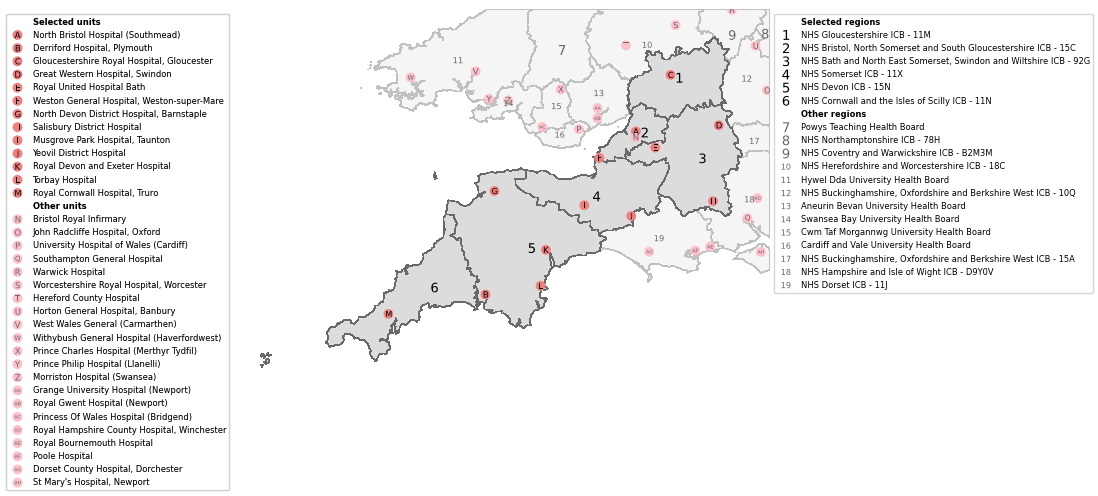

In [16]:
pathway_maps.plot_map_selected_regions(scenario=scenario.name, show=True)

### Set up the units

In [17]:
df_units = scenario.get_unit_services()

The above function automatically sets "selected" units to be those in the selected model areas.

In [18]:
df_units[df_units['selected'] == 1]

,postcode,stroke_team,ssnap_name,use_ivt,use_mt,use_msu,transfer_unit_postcode,lsoa_code,region,region_code,region_type,country,icb,icb_code,isdn,selected
101,GL13NN,"Gloucestershire Royal Hospital, Gloucester",Gloucestershire Royal Hospital,1,0,0,nearest,E01022311,NHS Gloucestershire ICB - 11M,E38000062,SICBL,England,NHS Gloucestershire Integrated Care Board,E54000043,"Gloucester, BSW, BNSSG and Somerset",1
102,SN36BB,"Great Western Hospital, Swindon",Great Western Hospital Swindon,1,0,0,nearest,E01015583,"NHS Bath and North East Somerset, Swindon and ...",E38000231,SICBL,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset",1
103,BS105NB,North Bristol Hospital (Southmead),North Bristol Hospitals,1,1,1,nearest,E01014631,"NHS Bristol, North Somerset and South Gloucest...",E38000222,SICBL,England,"NHS Bristol, North Somerset and South Gloucest...",E54000039,"Gloucester, BSW, BNSSG and Somerset",1
104,EX314JB,"North Devon District Hospital, Barnstaple",North Devon District Hospital,1,0,0,nearest,E01020134,NHS Devon ICB - 15N,E38000230,SICBL,England,NHS Devon Integrated Care Board,E54000037,"Devon, Cornwall and Isles of Scilly",1
105,PL68DH,"Derriford Hospital, Plymouth",Derriford Hospital,1,1,1,nearest,E01015092,NHS Devon ICB - 15N,E38000230,SICBL,England,NHS Devon Integrated Care Board,E54000037,"Devon, Cornwall and Isles of Scilly",1
106,TR13LQ,"Royal Cornwall Hospital, Truro",Royal Cornwall Hospital,1,0,0,nearest,E01018855,NHS Cornwall and the Isles of Scilly ICB - 11N,E38000089,SICBL,England,NHS Cornwall and the Isles of Scilly Integrate...,E54000036,"Devon, Cornwall and Isles of Scilly",1
107,EX25DW,Royal Devon and Exeter Hospital,Royal Devon and Exeter Hospital,1,0,0,nearest,E01020013,NHS Devon ICB - 15N,E38000230,SICBL,England,NHS Devon Integrated Care Board,E54000037,"Devon, Cornwall and Isles of Scilly",1
108,BA13NG,Royal United Hospital Bath,Royal United Hospital Bath,1,0,0,nearest,E01014428,"NHS Bath and North East Somerset, Swindon and ...",E38000231,SICBL,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset",1
109,SP28BJ,Salisbury District Hospital,Salisbury District Hospital,1,0,0,nearest,E01032000,"NHS Bath and North East Somerset, Swindon and ...",E38000231,SICBL,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset",1
110,TA15DA,"Musgrove Park Hospital, Taunton",Musgrove Park Hospital,1,0,0,nearest,E01029302,NHS Somerset ICB - 11X,E38000150,SICBL,England,NHS Somerset Integrated Care Board,E54000038,"Gloucester, BSW, BNSSG and Somerset",1


In [19]:
scenario.set_unit_services(df_units)

In [20]:
# TO DO - remove this step
transfer = scenario.get_transfer_units()
scenario.set_transfer_units(transfer)

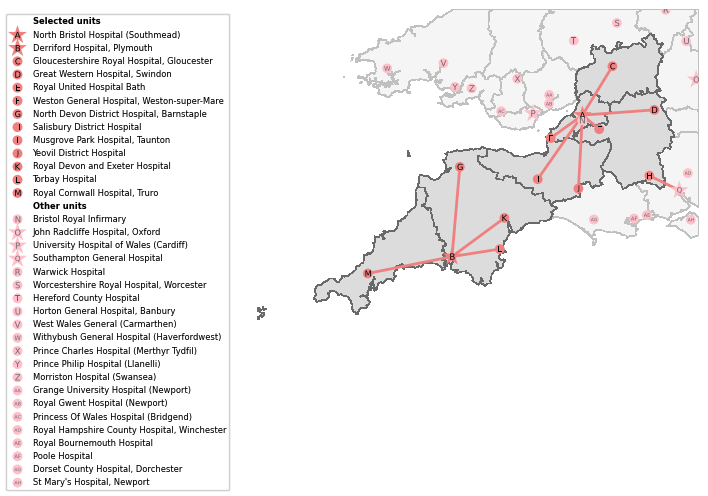

In [21]:
pathway_maps.plot_map_selected_units(scenario=scenario.name, show=True)

## LSOA catchment

In [22]:
scenario.find_lsoa_catchment_nearest()

In [23]:
scenario.find_lsoa_catchment_island()

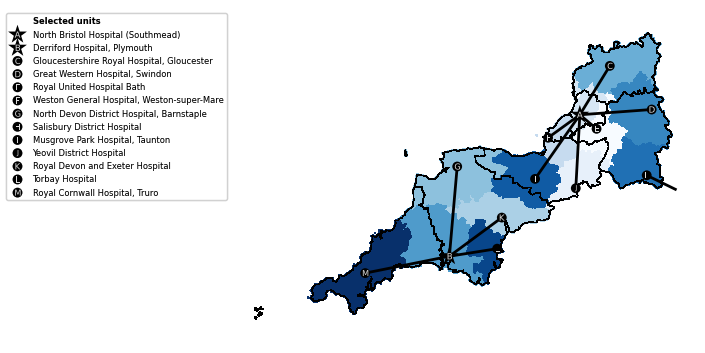

In [24]:
scenario.set_lsoa_catchment_type('island')

pathway_maps.plot_map_catchment(
    scenario='drip-and-ship', lsoa_catchment_type=scenario.lsoa_catchment_type, show=True)

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/array.py:1459: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as OSGB36 / British National Grid (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


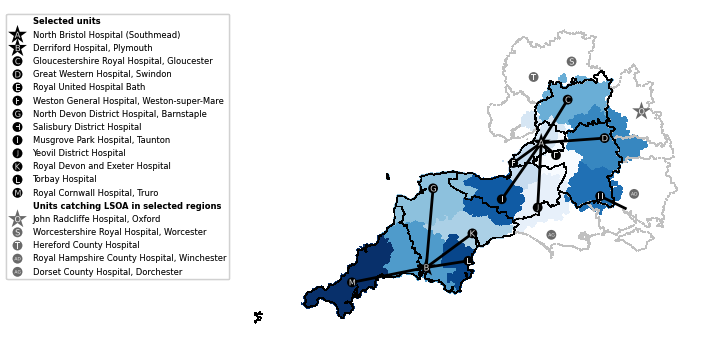

In [25]:
scenario.set_lsoa_catchment_type('nearest')

pathway_maps.plot_map_catchment(
    scenario='drip-and-ship', lsoa_catchment_type=scenario.lsoa_catchment_type, show=True)

In [26]:
pathway_maps.data_type

'single'

In [27]:
setup.save_to_file()

## Admissions

In [28]:
admissions = scenario.get_admissions()
scenario.set_admissions(admissions)

In [30]:
scenario.make_dicts_for_pathway()

## Run outcome results

In [31]:
model = Model(scenario)

model.run()

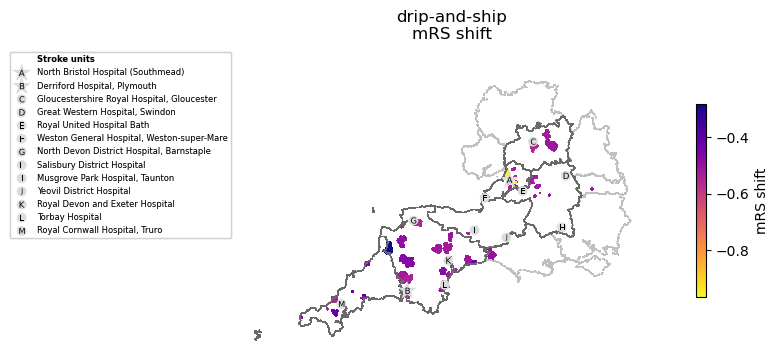

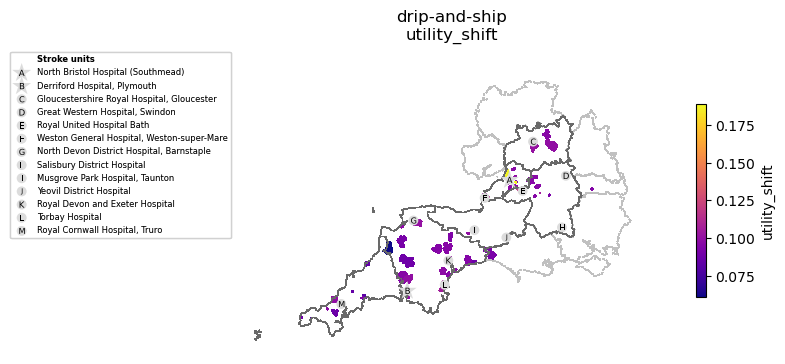

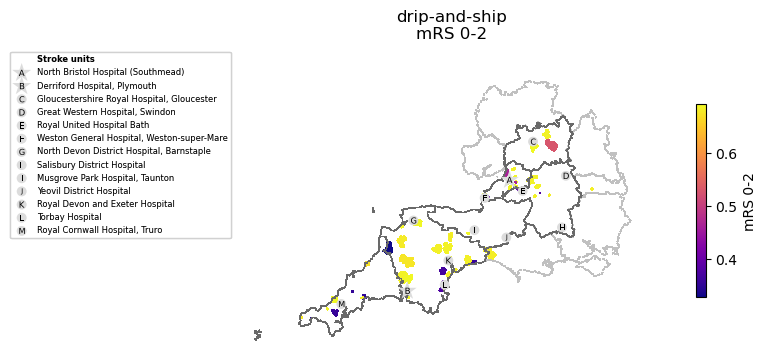

In [32]:
for outcome in ['mRS shift', 'utility_shift', 'mRS 0-2']:
    pathway_maps.plot_map_outcome(scenario='drip-and-ship', outcome=outcome, lsoa_catchment_type=scenario.lsoa_catchment_type, show=True)

In [33]:
print(stop, here, please)

NameError: name 'stop' is not defined

## Testing

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

a = ax.scatter([0, 5], [0, 5])

leg = ax.add_artist(plt.legend([a], ['hello'], bbox_to_anchor=(1.0, 1.0), loc='upper left'))

testing = ax.get_window_extent().transformed(
                ax.figure.transFigure.inverted())


extra_artists = (leg, )

# t = leg

# tbox = t.get_window_extent().transformed( ax.figure.transFigure.inverted() )
# bbox = ax.get_position()
# ax.set_position([
#     bbox.x0 + tbox.width,
#     bbox.y0 + tbox.height,
#     bbox.width - tbox.width,
#     bbox.height - tbox.height
# ]) 

# fig.add_subplot(221)

b = fig.add_axes([1.0, 0.5, 0.5, 0.1])
# b.set_visible(False)
b.set_axis_off() 

b = fig.add_axes([-0.2, 0.5, 0.5, 0.1])
# b.set_visible(False)
b.set_axis_off() 

# plt.tight_layout(w_pad=7)
# plt.subplots_adjust(right=0.7)
# ax.margins(x=0.6)

# fig.set_figheight(6)
# fig.set_figwidth(4)

fig.set_size_inches(6, 4)

plt.show()#bbox_extra_artists=extra_artists)

In [ ]:
print(testing.width)
print(testing.height)
print(testing.x0)
print(testing.y0)

In [ ]:
print(stop, here, please)

In [ ]:
from classes.model import Model
from classes.scenario import Scenario
from classes.setup import Setup

setup = Setup()

services_updates = {
    'PL68DH': {'Use_MSU': 0},  # No MSU for Derriford.
    'TQ27AA': {'Use_IVT': 0},  # No IVT for Torquay.
    # 'EX25DW': {'Nearest_MT': 'SW170QT'},  # Crazy value to show that it works.
}

# Scenario overwrites default values
scenario = Scenario({
    "setup": setup,
    'name': 'drip-and-ship',
    'select_lsoa_method': 'nearest',
    "run_duration": 5,  # years
    "mt_hub_postcodes":['PL68DH', 'BS105NB'],
    "services_updates":services_updates,
    "region_type_for_lsoa_selection":'ICB'
})

model = Model(scenario)

model.run()

from classes.map import plot_map_selected_units, plot_map_catchment, plot_map_outcome
# plot_map_selected_units(
#     setup, col=scenario.region_column_for_lsoa_selection)
# # TEMPORARILY commented out for speed of running. 29th Jan 2024
# # plot_map_catchment(
# #     setup, col=scenario.region_column_for_lsoa_selection)
plot_map_outcome(
    setup, col=scenario.region_column_for_lsoa_selection,
    outcome='mrs_shift', destination_type=scenario.destination_decision_type
)


In [ ]:
model.results_all

In [ ]:
completed_patients_keys = model.pathway.completed_patients[0].keys()
time_cols = [x for x in completed_patients_keys if x[0:4] == 'time']
time_cols.remove('time_onset')

In [ ]:
model.results_summary_all

In [ ]:
model.results_summary_by_admitting_unit

In [ ]:
model.results_all[np.isnan(model.results_all['time_puncture']) == False]

In [ ]:
model.results_all[np.isnan(model.results_all['time_needle']) == False]